In [1]:
apa_yang_dibahas ={1: "Data",
                    2: "bikin model",
                    3: "Fitting Modelnya ke training data",
                    4: "Evaluasi modelnya bikin prediksi",
                    5: "save dan load modelnya"}

In [2]:
print(apa_yang_dibahas)

{1: 'Data', 2: 'bikin model', 3: 'Fitting Modelnya ke training data', 4: 'Evaluasi modelnya bikin prediksi', 5: 'save dan load modelnya'}


Creating Dataset With Linear Regression

ML Tip:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

Import Dependencies/Frameworks

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

Data Preparing and loading

We'll use a linear regression formula to make a straight line with known parameters.

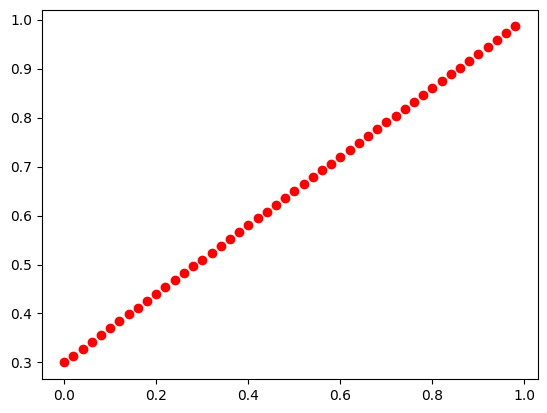

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1

step = 0.02           

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

plt.plot(x, y, 'ro')

Splitting data into training and testing data

In [5]:
len(x), len(y)

(50, 50)

In [6]:
#1 create train, test, split
train_split = int(0.8 * len(x))
X_train, y_train = x[:train_split], y[:train_split]
X_test, y_test = x[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

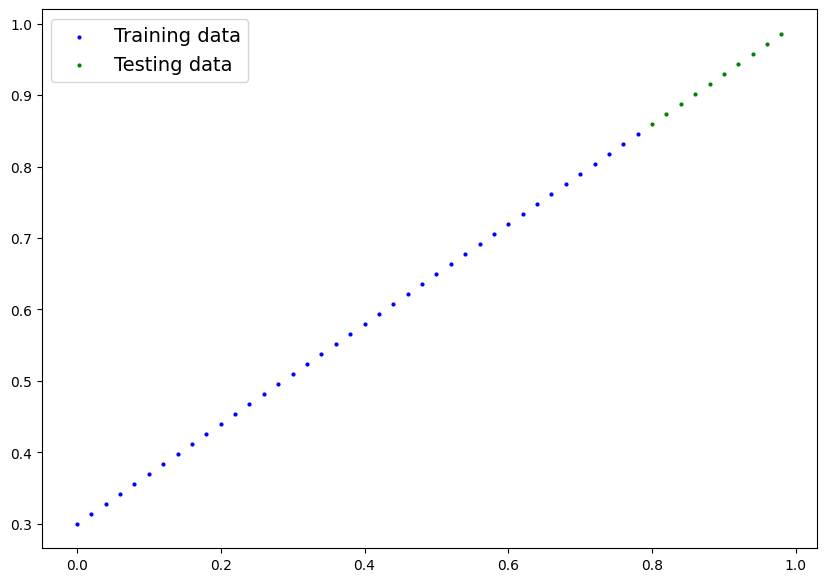

In [8]:
plot_predictions()

Create a Model
What the model does:
* Start With Random Weights and Biases
* Look at the training data and adjust the weights and biases slightly to make better predictions

How does it do so?
Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [9]:
#create linear regression model class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

Checking Content of the Model

In [10]:
#create random seed
torch.manual_seed(42)

#instantiate model
model0 = LinearRegression()

#Check The Models
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#making predictions
with torch.inference_mode():    
    preds0 = model0(X_test)

preds0

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

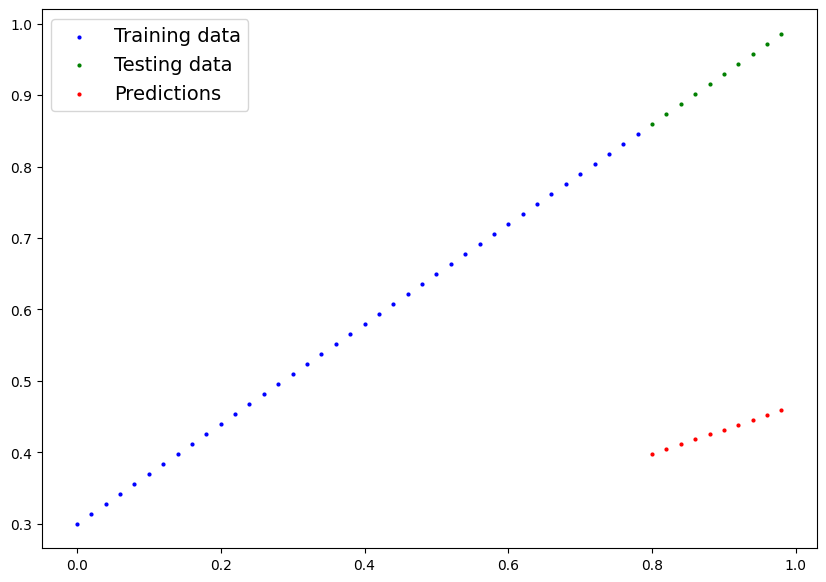

In [12]:
plot_predictions(predictions=preds0)

Training the Model
=

The Whole Idea of Training is for a model to move from some random parameters to parameters that can make accurate predictions.

in other words from a poor representation of the data to a good representation of the data.

One Way to measure how good a model is, is to use the loss function.

Thing we need to train a model:

* Loss Function: A way to measure how good a model is at making predictions.
* Optimizer: A way to adjust a model's internal parameters to improve its predictions.



In [13]:
#check model parameters
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
#setup loss
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01) #lr = learning rate = the most important hyperparameter


Building Training Loop and testing loop
=
Things we need to in a training loop:
1. Loop through the training data
2. Perform a forward pass and calculate the loss - also called the forward propagation
4. Optimizer zero gradients
5. Backpropagation - move backward through the network to calculate gradients of each parameter with respect to the loss
6. Optimizer step - use optimizer to adjust weights and biases in the direction that reduces the loss i.e. perform a backward propagation
 

lanjur 6:16

In [15]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [16]:
torch.manual_seed(42)
epochs = 175 #train with 175 epochs

epoch_count = []
loss_count = []
test_loss_count = []
for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model0.eval()#eval mode in Pytorch sets all parameters to requires_grad=False
    with torch.inference_mode():
        #1 Forward pass on the test data
        test_preds = model0(X_test)
        #2 Calculate the loss on the test data
        test_loss = loss_fn(test_preds, y_test)

    # Print out what epoch we're on, the loss and the test loss

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_count.append(loss)
        test_loss_count.append(test_loss)
        print(f"epoch: {epoch} loss: {loss} test loss: {test_loss}")
        print(model0.state_dict())

epoch: 0 loss: 0.31288138031959534 test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
epoch: 10 loss: 0.1976713240146637 test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
epoch: 20 loss: 0.08908725529909134 test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
epoch: 30 loss: 0.053148526698350906 test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
epoch: 40 loss: 0.04543796554207802 test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
epoch: 50 loss: 0.04167863354086876 test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
epoch: 60 loss: 0.03818932920694351 test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
epoch: 70 loss: 0.0347

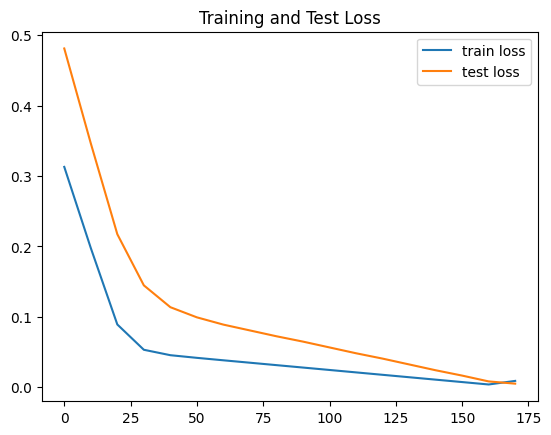

In [17]:
plt.plot(epoch_count, torch.tensor(loss_count).detach().numpy(), label='train loss')
plt.plot(epoch_count, torch.tensor(test_loss_count).detach().numpy(), label='test loss')
plt.title("Training and Test Loss")
plt.legend()

In [18]:
with torch.inference_mode():    
    preds0_new = model0(X_test)

Check Our predictions before and after training

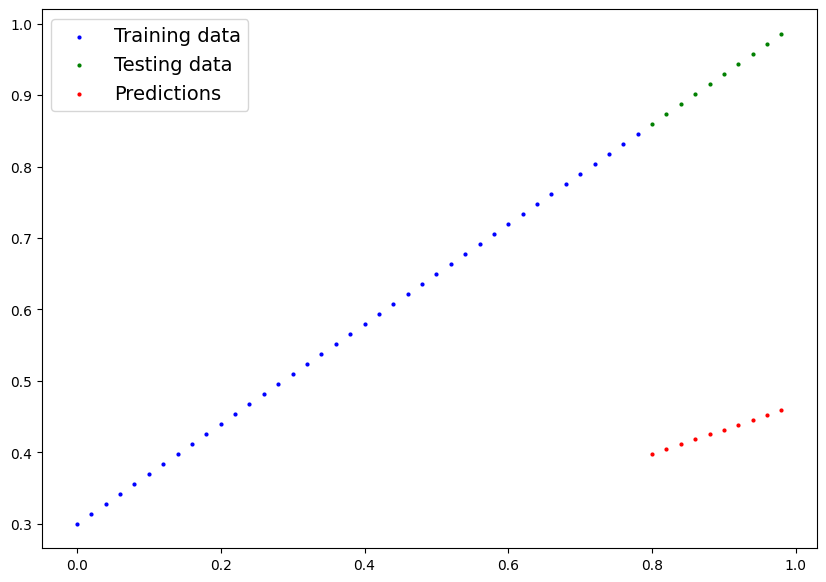

In [19]:
#before training
plot_predictions(predictions=preds0)

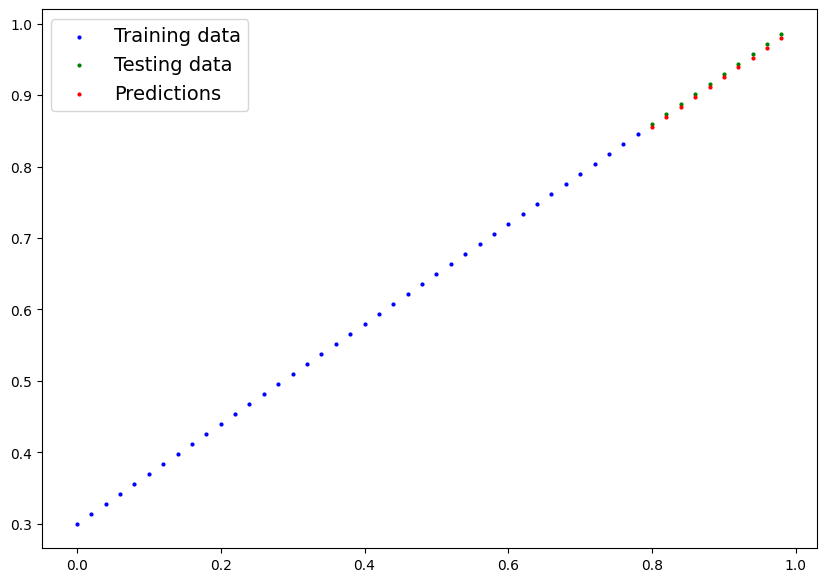

In [20]:
#after training
plot_predictions(predictions=preds0_new)

Saving/Loading The Model
=

In [21]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [22]:
#saving the model
from pathlib import Path

#1. Create Model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "model1.pth"
SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save model state dict
torch.save(obj=model0.state_dict(), f=SAVE_PATH)

#4 Save Entire Model (optional)
MODEL_NAME2= "modefull.pth"
SAVE_PATH2 = MODEL_PATH / MODEL_NAME
torch.save(obj=model0, f=SAVE_PATH)

In [23]:
#5. Load model
loaded_model = torch.load(f=SAVE_PATH)
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [24]:
#make predictions with loaded model
loaded_model.eval()
with torch.inference_mode():
    preds_loaded = loaded_model(X_test)

preds_loaded

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [25]:
#compare loaded model predictions with original model predictions
preds0_new == preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])